In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [35]:
def show(name,n,m,i,title):
    plt.subplot(n,m,i)
    plt.imshow(name,cmap='gray')
    plt.title(title)
    plt.axis('off')


In [36]:
def grayscale_image(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    return gray

In [37]:
def binary_threshold(gray, threshold=128):
    _, binary = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    return binary

In [38]:
def gray_16_levels(gray):
    gray_16 = (gray // 16) * 16  # Quantize grayscale to 16 levels
    return gray_16

In [39]:
def sobel_edge_detection(gray):
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    return sobel_combined

In [40]:
def canny_edge_detection(gray, threshold1=100, threshold2=200):
    canny = cv2.Canny(gray, threshold1, threshold2)
    return canny

In [41]:
def gaussian_blur(image):
    gaussian_kernel = np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]]) / 16.0  # Normalize the kernel

    # Apply the kernel using filter2D to blur the image and remove noise
    blurred = cv2.filter2D(image, -1, gaussian_kernel)
    return blurred

In [42]:
def sharpen_image(blurred):
    sharpen_kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
    sharpened = cv2.filter2D(blurred, -1, sharpen_kernel)
    return sharpened

In [43]:
def rgb_to_bgr(frame):
    bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    return bgr

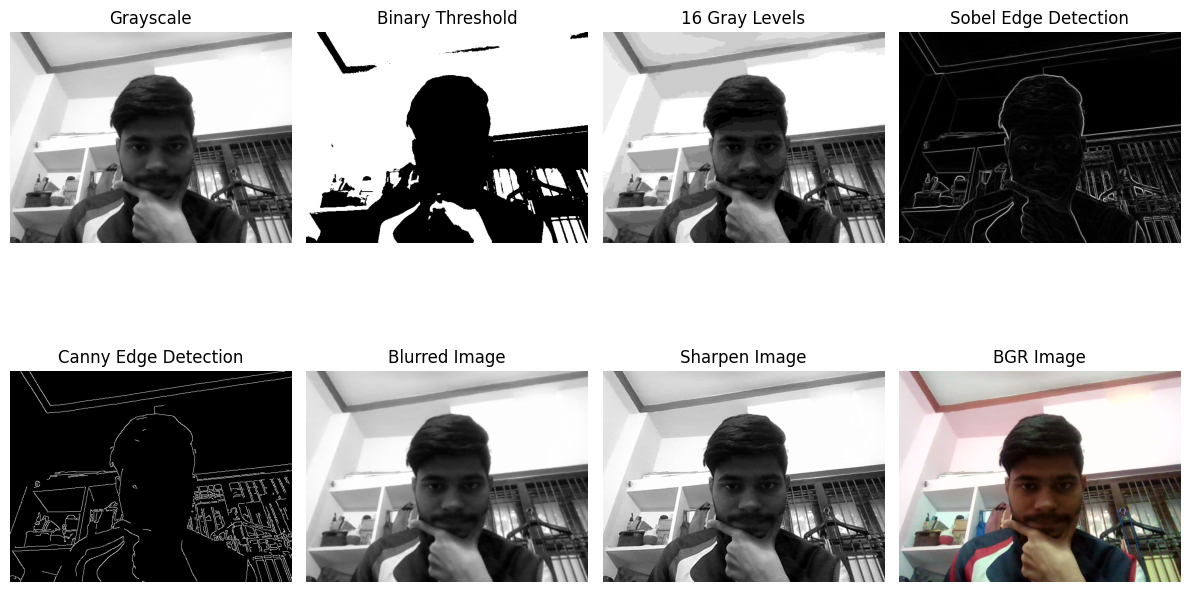

In [44]:
cap = cv2.VideoCapture(0)  # Access the default camera
ret, frame = cap.read()
cap.release()
cv2.destroyAllWindows()

# Process the images
gray = grayscale_image(frame)
binary = binary_threshold(gray)
gray_16 = gray_16_levels(gray)
sobel = sobel_edge_detection(gray)
canny = canny_edge_detection(gray)
blurred = gaussian_blur(gray)
sharpened = sharpen_image(blurred)
bgr = rgb_to_bgr(frame)

# Display results in a 2x4 grid
plt.figure(figsize=(12, 8))
show(gray, 2, 4, 1, 'Grayscale')
show(binary, 2, 4, 2, 'Binary Threshold')
show(gray_16, 2, 4, 3, '16 Gray Levels')
show(sobel, 2, 4, 4, 'Sobel Edge Detection')
show(canny, 2, 4, 5, 'Canny Edge Detection')
show(blurred, 2, 4, 6, 'Blurred Image')
show(sharpened, 2, 4, 7, 'Sharpen Image')
show(bgr, 2, 4, 8, 'BGR Image')

plt.tight_layout()
plt.show()
